<a href="https://colab.research.google.com/github/eesa-syed/Libraries-for-Python/blob/master/BetterLifeIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [3]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [8]:
from google.colab import files
uploaded = files.upload()

Saving oecd_bli_2015.csv to oecd_bli_2015.csv


In [9]:
from google.colab import files
uploaded = files.upload()

Saving gdp_per_capita.csv to gdp_per_capita.csv


In [13]:
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',', delimiter='\t', encoding='latin1', na_values="n/a")

In [14]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    #get the pandas dataframe of GDP per capita and Life satisfaction
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    return full_country_stats[["GDP per capita", 'Life satisfaction']]

country_states = prepare_country_stats(oecd_bli,gdp_per_capita)
x=np.c_[country_states["GDP per capita"]]
y=np.c_[country_states["Life satisfaction"]]

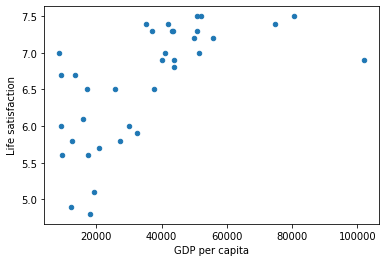

In [15]:
country_states.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [16]:
model = sklearn.linear_model.LinearRegression()

In [17]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

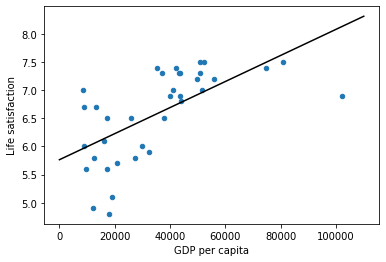

In [23]:
country_states.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
t0, t1 = model.intercept_[0], model.coef_[0][0]
x = np.linspace(0, 110000, 1000)
plt.plot(x, t0 + t1 * x, "k")
plt.show()

In [24]:
x_new=[[22587]]
print(model.predict(x_new))

[[6.28653637]]
